In [144]:
import pandas as pd

In [149]:
df = pd.read_csv('/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/genomes_jlee/human.bed', sep='\t', names=['chrom', 'start', 'end', 'gene', '_del', 'strand'] )


In [150]:
df

chrom      start        end             gene _del strand
0      chr1      11868      14409  ENSG00000223972    .      +
1      chr1      14403      29570  ENSG00000227232    .      -
2      chr1      17368      17436  ENSG00000278267    .      -
3      chr1      29553      31109  ENSG00000243485    .      +
4      chr1      30365      30503  ENSG00000284332    .      +
...     ...        ...        ...              ...  ...    ...
57776  chrX  155997580  156010817  ENSG00000124334    .      +
57777  chrX  156004217  156022236  ENSG00000270726    .      +
57778  chrX  156014622  156016837  ENSG00000185203    .      -
57779  chrX  156020825  156025710  ENSG00000182484    .      +
57780  chrX  156025663  156027877  ENSG00000227159    .      -

[57781 rows x 6 columns]

In [152]:
df['len'] = df['start'] - df['end']

In [153]:
df['len'] = df['len'].abs()

In [155]:
df['len'].median()

3170.0

In [156]:
df['len'].max()

2473537

In [157]:
df['len'].min()

8

<AxesSubplot:xlabel='len', ylabel='Count'>

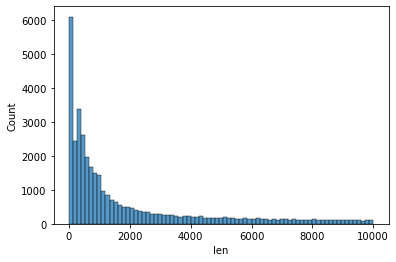

In [165]:
import seaborn as sns
sns.histplot(df['len'], binrange=(1,10000))

In [167]:
df[df['len'] > 10000]

chrom      start        end             gene _del strand     len
1      chr1      14403      29570  ENSG00000227232    .      -   15167
9      chr1      89294     133723  ENSG00000238009    .      -   44429
15     chr1     141473     173862  ENSG00000241860    .      -   32389
19     chr1     185216     195411  ENSG00000279457    .      -   10195
21     chr1     257863     359681  ENSG00000228463    .      -  101818
...     ...        ...        ...              ...  ...    ...     ...
57769  chrX  155490114  155669944  ENSG00000185973    .      -  179830
57770  chrX  155767811  155782459  ENSG00000168939    .      +   14648
57773  chrX  155881292  155943769  ENSG00000124333    .      +   62477
57776  chrX  155997580  156010817  ENSG00000124334    .      +   13237
57777  chrX  156004217  156022236  ENSG00000270726    .      +   18019

[21208 rows x 7 columns]

In [168]:
df

chrom      start        end             gene _del strand    len
0      chr1      11868      14409  ENSG00000223972    .      +   2541
1      chr1      14403      29570  ENSG00000227232    .      -  15167
2      chr1      17368      17436  ENSG00000278267    .      -     68
3      chr1      29553      31109  ENSG00000243485    .      +   1556
4      chr1      30365      30503  ENSG00000284332    .      +    138
...     ...        ...        ...              ...  ...    ...    ...
57776  chrX  155997580  156010817  ENSG00000124334    .      +  13237
57777  chrX  156004217  156022236  ENSG00000270726    .      +  18019
57778  chrX  156014622  156016837  ENSG00000185203    .      -   2215
57779  chrX  156020825  156025710  ENSG00000182484    .      +   4885
57780  chrX  156025663  156027877  ENSG00000227159    .      -   2214

[57781 rows x 7 columns]

In [116]:
import pandas as pd
y=pd.read_csv('/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/genomes_jlee/Drosophila_melanogaster.BDGP6.93.gtf.gz', sep='\t|', skiprows=4)

<ipython-input-116-6432890ccb8c>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  y=pd.read_csv('/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/genomes_jlee/Drosophila_melanogaster.BDGP6.93.gtf.gz', sep='\t|', skiprows=4)


ParserError: Expected 265 fields in line 7, saw 301. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.

In [118]:
!conda install -c bioconda pyranges

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/lohia/miniconda3/envs/hicexplorer

  added / updated specs:
    - pyranges


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.7.5   |       h06a4308_1         113 KB
    certifi-2021.5.30          |   py38h06a4308_0         138 KB
    natsort-7.1.1              |     pyhd3eb1b0_0          33 KB
    ncls-0.0.60                |   py38h4a8c8d9_0         671 KB  bioconda
    pyranges-0.0.101           |     pyh5e36f6f_0         671 KB  bioconda
    pyrle-0.0.33               |   py38h4a8c8d9_0         479 KB  bioconda
    sorted_nearest-0.0.33      |   py38h9af456f_0         1.5 MB  bioconda
    tabulate-0.8.9       

In [228]:
import pyranges as pr

# as PyRanges-object
gr = pr.read_gtf("/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/genomes_jlee/Mus_musculus.GRCm38.94.gtf.gz")
df = gr.df
df_gene = df[df['Feature'] == 'gene']


In [242]:
gene_data = gene_data[gene_data['Chromosome']=='chrX']

In [243]:
gene_data['txStart'] = [x if strand == '+' else y for x,y,strand in zip(gene_data['Start'], gene_data['End'], gene_data['Strand'])]

<ipython-input-243-dbaf846e0216>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gene_data['txStart'] = [x if strand == '+' else y for x,y,strand in zip(gene_data['Start'], gene_data['End'], gene_data['Strand'])]


In [244]:
    dist_mat = ssd.squareform(
                 ssd.pdist(
                   np.reshape(
                     np.array(gene_data['txStart']),
                     (gene_data.shape[0], 1)
                   )
                 )
               )
    dist_mat = pd.DataFrame(dist_mat, index=gene_data['gene_id'],
                            columns=gene_data['gene_id'])

NameError: name 'ssd' is not defined

In [238]:
    base_folder = "/sonas-hs/gillis/hpc/data/"
    species = 'human'
    chr_list = ["chr1","chr2","chr3","chr4","chr5","chr6","chr7","chr8","chr9","chr10","chr11","chr12","chr13","chr14","chr15","chr16","chr17","chr18","chr19","chr20","chr21","chr22","chrX"]
    genome_info_file= "/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/genomes_jlee/gencode.v28.chr_patch_hapl_scaff.annotation.gtf.gz"
    # as PyRanges-object
    gr = pr.read_gtf(genome_info_file)
    df = gr.df
    gene_data = df[df['Feature'] == 'gene']
    gene_data['gene_id'] = [x.split('.')[0] for x in gene_data['gene_id']]
    gene_data['gene_id'].drop_duplicates(inplace=True)
    

    
    if species != 'human':
        gene_data['Chromosome'] = ['chr'+x for x in gene_data['Chromosome']]
        
    new = gene_data["Chromosome"].isin(chr_list)
  

    gene_data = gene_data[new]
    gene_data.sort_values(by=['Chromosome', 'Start'], inplace=True)
            
    gene_data[['Chromosome', 'Start', 'End',  'gene_id', 'Score' , 'Strand']].to_csv(f'{base_folder}/lohia/hi_c_data_processing/genomes_jlee/{species}.bed', sep = '\t', header=None, index=False)

<ipython-input-238-8abab5121263>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gene_data['gene_id'] = [x.split('.')[0] for x in gene_data['gene_id']]
<ipython-input-238-8abab5121263>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gene_data['gene_id'].drop_duplicates(inplace=True)


In [239]:
    base_folder = "/sonas-hs/gillis/hpc/data/"
    species = 'mouse'
    chr_list = ["chr1","chr2","chr3","chr4","chr5","chr6","chr7","chr8","chr9","chr10","chr11","chr12","chr13","chr14","chr15","chr16","chr17","chr18","chr19","chrX"]
    genome_info_file= "/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/genomes_jlee/Mus_musculus.GRCm38.94.gtf.gz"
    # as PyRanges-object
    gr = pr.read_gtf(genome_info_file)
    df = gr.df
    gene_data = df[df['Feature'] == 'gene']
    gene_data['gene_id'] = [x.split('.')[0] for x in gene_data['gene_id']]
    gene_data['gene_id'].drop_duplicates(inplace=True)
    

    
    if species != 'human':
        gene_data['Chromosome'] = ['chr'+x for x in gene_data['Chromosome']]
        
    new = gene_data["Chromosome"].isin(chr_list)
  

    gene_data = gene_data[new]
    gene_data.sort_values(by=['Chromosome', 'Start'], inplace=True)
            
    gene_data[['Chromosome', 'Start', 'End',  'gene_id', 'Score' , 'Strand']].to_csv(f'{base_folder}/lohia/hi_c_data_processing/genomes_jlee/{species}.bed', sep = '\t', header=None, index=False)

<ipython-input-239-f41c0399497e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gene_data['gene_id'] = [x.split('.')[0] for x in gene_data['gene_id']]
<ipython-input-239-f41c0399497e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gene_data['gene_id'].drop_duplicates(inplace=True)
<ipython-input-239-f41c0399497e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [ ]:
    base_folder = "/sonas-hs/gillis/hpc/data/"
    species = 'human'
    genome_info_file= "/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/genomes_jlee/gencode.v28.chr_patch_hapl_scaff.annotation.gtf.gz"
    # as PyRanges-object
    gr = pr.read_gtf(genome_info_file)
    df = gr.df
    gene_data = df[df['Feature'] == 'gene']
    gene_data['gene_id'] = [x.split('.')[0] for x in gene_data['gene_id']]
    gene_data['gene_id'].drop_duplicates(inplace=True)
    

    
    if species != 'human':
        gene_data['Chromosome'] = ['chr'+x for x in gene_data['Chromosome']]
        
    new = gene_data["Chromosome"].isin(chr_list)
  

    gene_data = gene_data[new]
    gene_data.sort_values(by=['Chromosome', 'Start'], inplace=True)
            
    gene_data[['Chromosome', 'Start', 'End',  'gene_id', 'Score' , 'Strand']].to_csv(f'{base_folder}/lohia/hi_c_data_processing/genomes_jlee/{species}.bed', sep = '\t', header=None, index=False)

In [229]:
df_gene['gene_id'].drop_duplicates(inplace=True)

<ipython-input-229-ae26c0c0fad6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gene['gene_id'].drop_duplicates(inplace=True)


In [219]:
df_gene.columns

Index(['Chromosome', 'Source', 'Feature', 'Start', 'End', 'Score', 'Strand',
       'Frame', 'gene_id', 'gene_name', 'gene_source', 'gene_biotype',
       'transcript_id', 'transcript_name', 'transcript_source',
       'transcript_biotype', 'exon_number', 'exon_id', 'protein_id',
       'protein_version', 'tag'],
      dtype='object')

In [222]:
df_gene.columns

Index(['Chromosome', 'Source', 'Feature', 'Start', 'End', 'Score', 'Strand',
       'Frame', 'gene_id', 'gene_version', 'gene_name', 'gene_source',
       'gene_biotype', 'transcript_id', 'transcript_version',
       'transcript_name', 'transcript_source', 'transcript_biotype', 'tag',
       'transcript_support_level', 'exon_number', 'exon_id', 'exon_version',
       'ccds_id', 'protein_id', 'protein_version'],
      dtype='object')

In [176]:
df = gr.df

In [226]:
df_gene['Start'] = df_gene['Start'].astype('int')

<ipython-input-226-3d6d43b4ae8a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gene['Start'] = df_gene['Start'].astype('int')


In [ ]:
new = df_gene["Chromosome"].isin(chr_list)
  
# displaying data with gender = male only
df_gene[new]
df_gene.sort_values(by=['Chromosome', 'Start'])

In [232]:
new = df_gene["Chromosome"].isin(['Y'])

In [235]:
df_gene = df_gene[new]

In [236]:
df_gene

Chromosome          Source Feature     Start       End Score Strand  \
1793948          Y          havana    gene    206150    207788     .      +   
1793953          Y  ensembl_havana    gene    818648    844224     .      +   
1794066          Y          havana    gene    873639    874215     .      +   
1794069          Y  ensembl_havana    gene    897787    956786     .      +   
1794310          Y  ensembl_havana    gene   1010542   1028847     .      +   
...            ...             ...     ...       ...       ...   ...    ...   
1807427          Y          havana    gene  90499046  90531645     .      -   
1807439          Y          havana    gene  90603500  90605864     .      -   
1807449          Y          havana    gene  90665345  90667625     .      -   
1807459          Y         ensembl    gene  90754512  90754821     .      -   
1807465          Y         ensembl    gene  90838868  90839177     .      -   

        Frame             gene_id gene_version  ... transcript_source  \
1793948     .  ENSMUSG00000101796            1  ...               NaN   
1793953     .  ENSMUSG00000069053           11  ...               NaN   
1794066     .  ENSMUSG00000101666            1  ...               NaN   
1794069     .  ENSMUSG00000056673           14  ...               NaN   
1794310     .  ENSMUSG00000069049           11  ...               NaN   
...       ...                 ...          ...  ...               ...   
1807427     .  ENSMUSG00000100964            1  ...               NaN   
1807439     .  ENSMUSG00000099619            6  ...               NaN   
1807449     .  ENSMUSG00000099399            6  ...               NaN   
1807459     .  ENSMUSG00000095366            1  ...               NaN   
1807465     .  ENSMUSG00000096850            1  ...               NaN   

        transcript_biotype  tag transcript_support_level exon_number exon_id  \
1793948                NaN  NaN                      NaN         NaN     NaN   
1793953                NaN  NaN                      NaN         NaN     NaN   
1794066                NaN  NaN                      NaN         NaN     NaN   
1794069                NaN  NaN                      NaN         NaN     NaN   
1794310                NaN  NaN                      NaN         NaN     NaN   
...                    ...  ...                      ...         ...     ...   
1807427                NaN  NaN                      NaN         NaN     NaN   
1807439                NaN  NaN                      NaN         NaN     NaN   
1807449                NaN  NaN                      NaN         NaN     NaN   
1807459                NaN  NaN                      NaN         NaN     NaN   
1807465                NaN  NaN                      NaN         NaN     NaN   

        exon_version ccds_id protein_id protein_version  
1793948          NaN     NaN        NaN             NaN  
1793953          NaN     NaN        NaN             NaN  
1794066          NaN     NaN        NaN             NaN  
1794069          NaN     NaN        NaN             NaN  
1794310          NaN     NaN        NaN             NaN  
...              ...     ...        ...             ...  
1807427          NaN     NaN        NaN             NaN  
1807439          NaN     NaN        NaN             NaN  
1807449          NaN     NaN        NaN             NaN  
1807459          NaN     NaN        NaN             NaN  
1807465          NaN     NaN        NaN             NaN  

[1570 rows x 26 columns]

In [230]:
df_gene.sort_values(by=['Chromosome', 'Start'])

Chromosome          Source Feature     Start       End Score Strand  \
0                1          havana    gene   3073252   3074322     .      +   
3                1         ensembl    gene   3102015   3102125     .      +   
56879            1  ensembl_havana    gene   3205900   3671498     .      -   
6                1          havana    gene   3252756   3253236     .      +   
56897            1          havana    gene   3365730   3368549     .      -   
...            ...             ...     ...       ...       ...   ...    ...   
1800469          Y          havana    gene  90753056  90763485     .      +   
1807459          Y         ensembl    gene  90754512  90754821     .      -   
1800478          Y         ensembl    gene  90784737  90816464     .      +   
1800533          Y          havana    gene  90837412  90844040     .      +   
1807465          Y         ensembl    gene  90838868  90839177     .      -   

        Frame             gene_id gene_version  ... transcript_source  \
0           .  ENSMUSG00000102693            1  ...               NaN   
3           .  ENSMUSG00000064842            1  ...               NaN   
56879       .  ENSMUSG00000051951            5  ...               NaN   
6           .  ENSMUSG00000102851            1  ...               NaN   
56897       .  ENSMUSG00000103377            1  ...               NaN   
...       ...                 ...          ...  ...               ...   
1800469     .  ENSMUSG00000095134            2  ...               NaN   
1807459     .  ENSMUSG00000095366            1  ...               NaN   
1800478     .  ENSMUSG00000096768            7  ...               NaN   
1800533     .  ENSMUSG00000099871            1  ...               NaN   
1807465     .  ENSMUSG00000096850            1  ...               NaN   

        transcript_biotype  tag transcript_support_level exon_number exon_id  \
0                      NaN  NaN                      NaN         NaN     NaN   
3                      NaN  NaN                      NaN         NaN     NaN   
56879                  NaN  NaN                      NaN         NaN     NaN   
6                      NaN  NaN                      NaN         NaN     NaN   
56897                  NaN  NaN                      NaN         NaN     NaN   
...                    ...  ...                      ...         ...     ...   
1800469                NaN  NaN                      NaN         NaN     NaN   
1807459                NaN  NaN                      NaN         NaN     NaN   
1800478                NaN  NaN                      NaN         NaN     NaN   
1800533                NaN  NaN                      NaN         NaN     NaN   
1807465                NaN  NaN                      NaN         NaN     NaN   

        exon_version ccds_id protein_id protein_version  
0                NaN     NaN        NaN             NaN  
3                NaN     NaN        NaN             NaN  
56879            NaN     NaN        NaN             NaN  
6                NaN     NaN        NaN             NaN  
56897            NaN     NaN        NaN             NaN  
...              ...     ...        ...             ...  
1800469          NaN     NaN        NaN             NaN  
1807459          NaN     NaN        NaN             NaN  
1800478          NaN     NaN        NaN             NaN  
1800533          NaN     NaN        NaN             NaN  
1807465          NaN     NaN        NaN             NaN  

[54532 rows x 26 columns]

In [ ]:
cat file.gtf | awk '{print $1,$4,$5,"name",$6,$7}'

In [213]:
df_gene[df_gene['Chromosome'] == 'chr4']

Chromosome  Source Feature      Start        End Score Strand Frame  \
857467       chr4  HAVANA    gene      53284      88211     .      +     .   
857518       chr4  HAVANA    gene     124479     202303     .      +     .   
857560       chr4  HAVANA    gene     149737     150317     .      +     .   
857563       chr4  HAVANA    gene     212609     255985     .      +     .   
857571       chr4  HAVANA    gene     337813     384864     .      +     .   
...           ...     ...     ...        ...        ...   ...    ...   ...   
965122       chr4  HAVANA    gene  190021406  190022665     .      -     .   
965125       chr4  HAVANA    gene  190024350  190027257     .      -     .   
965152       chr4  HAVANA    gene  190037915  190038399     .      -     .   
965155       chr4  HAVANA    gene  190057901  190063005     .      -     .   
965169       chr4  HAVANA    gene  190195737  190195978     .      -     .   

                   gene_id                           gene_type  ...  \
857467   ENSG00000272602.5                      protein_coding  ...   
857518   ENSG00000250312.7                      protein_coding  ...   
857560   ENSG00000275426.1                      sense_intronic  ...   
857563   ENSG00000198155.5  transcribed_unprocessed_pseudogene  ...   
857571  ENSG00000131127.13                      protein_coding  ...   
...                    ...                                 ...  ...   
965122   ENSG00000224807.5              unprocessed_pseudogene  ...   
965125   ENSG00000205097.6                      protein_coding  ...   
965152   ENSG00000250053.1                processed_pseudogene  ...   
965155   ENSG00000249003.1              unprocessed_pseudogene  ...   
965169   ENSG00000282994.1                processed_pseudogene  ...   

       transcript_type transcript_name transcript_support_level  \
857467             NaN             NaN                      NaN   
857518             NaN             NaN                      NaN   
857560             NaN             NaN                      NaN   
857563             NaN             NaN                      NaN   
857571             NaN             NaN                      NaN   
...                ...             ...                      ...   
965122             NaN             NaN                      NaN   
965125             NaN             NaN                      NaN   
965152             NaN             NaN                      NaN   
965155             NaN             NaN                      NaN   
965169             NaN             NaN                      NaN   

                   tag havana_transcript exon_number exon_id  ont protein_id  \
857467             NaN               NaN         NaN     NaN  NaN        NaN   
857518             NaN               NaN         NaN     NaN  NaN        NaN   
857560             NaN               NaN         NaN     NaN  NaN        NaN   
857563             NaN               NaN         NaN     NaN  NaN        NaN   
857571      ncRNA_host               NaN         NaN     NaN  NaN        NaN   
...                ...               ...         ...     ...  ...        ...   
965122  pseudo_consens               NaN         NaN     NaN  NaN        NaN   
965125             NaN               NaN         NaN     NaN  NaN        NaN   
965152  pseudo_consens               NaN         NaN     NaN  NaN        NaN   
965155             NaN               NaN         NaN     NaN  NaN        NaN   
965169             NaN               NaN         NaN     NaN  NaN        NaN   

       ccdsid  
857467    NaN  
857518    NaN  
857560    NaN  
857563    NaN  
857571    NaN  
...       ...  
965122    NaN  
965125    NaN  
965152    NaN  
965155    NaN  
965169    NaN  

[2507 rows x 24 columns]

In [212]:
[x.split('(')[0] for x in df_gene['gene_id'].head()]

['ENSG00000278704.1',
 'ENSG00000277400.1',
 'ENSG00000274847.1',
 'ENSG00000278198.1',
 'ENSG00000277428.1']

In [140]:
df_exp_rank = pd.read_csv('/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/mouse_human_orthoNM.csv')
df_exp_rank = df_exp_rank.drop_duplicates(subset=['human'], keep=False)
df_exp_rank = df_exp_rank.drop_duplicates(subset=['mouse'], keep=False)
df_exp_rank

human               mouse  human_OrthoID   mouse_OrthoID
0      ENSG00000198712  ENSMUSG00000064354  9606_0:00000a  10090_0:000000
1      ENSG00000198763  ENSMUSG00000064345  9606_0:000002  10090_0:000001
2      ENSG00000198727  ENSMUSG00000064370  9606_0:000006  10090_0:000002
3      ENSG00000198886  ENSMUSG00000064363  9606_0:000005  10090_0:000003
4      ENSG00000198899  ENSMUSG00000064357  9606_0:000003  10090_0:000004
...                ...                 ...            ...             ...
21098  ENSG00000152242  ENSMUSG00000047466  9606_0:004443  10090_0:00598f
21099  ENSG00000152240  ENSMUSG00000041840  9606_0:0044fa  10090_0:005990
21100  ENSG00000147082  ENSMUSG00000051592  9606_0:005016  10090_0:005992
21101  ENSG00000072133  ENSMUSG00000025665  9606_0:0052d4  10090_0:005994
21102  ENSG00000101842  ENSMUSG00000031430  9606_0:005255  10090_0:005996

[14171 rows x 4 columns]

In [142]:
import pandas as pd
df_exp_rank = pd.read_csv('/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/drosophila_mouse_orthoNM.csv')
df_exp_rank = df_exp_rank.drop_duplicates(subset=['drosophila'], keep=False)
df_exp_rank = df_exp_rank.drop_duplicates(subset=['mouse'], keep=False)
file_path_1 = "/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_mouse/aggregates/25kbp_raw/max/jac_sim/90/all_bins/KR_ranked_KR/all/hic_gene_corr_gw_1_percent.txt"

auc_values_1 = pd.read_csv(file_path_1, sep='\t')
#auc_values_1 = auc_values_1[auc_values_1['auc'] > np.percentile(auc_values_1['auc'], 90)]
df1 = df_exp_rank.merge(auc_values_1, left_on='mouse', right_on='gene_id_exp_file')
file_path_2 = "/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_drosophila/aggregates/25kbp_raw/max/jac_sim/90/all_bins/KR_ranked_KR/all/hic_gene_corr_gw_1_percent.txt"
auc_values_1 = pd.read_csv(file_path_2, sep='\t')
#auc_values_1 = auc_values_1[auc_values_1['auc'] > np.percentile(auc_values_1['auc'], 90)]
df2 = df1.merge(auc_values_1, left_on='drosophila', right_on='gene_id_exp_file')


In [143]:
df2

drosophila               mouse fruitfly_OrthoID   mouse_OrthoID  \
0     FBgn0036973  ENSMUSG00000026439    7227_0:001de4  10090_0:000015   
1     FBgn0051665  ENSMUSG00000036766    7227_0:0000d8  10090_0:00001f   
2     FBgn0037529  ENSMUSG00000060679    7227_0:0020e2  10090_0:000035   
3     FBgn0002354  ENSMUSG00000026500    7227_0:002384  10090_0:00003d   
4     FBgn0039304  ENSMUSG00000009905    7227_0:002943  10090_0:00003f   
...           ...                 ...              ...             ...   
2326  FBgn0030000  ENSMUSG00000024312    7227_0:002f74  10090_0:005886   
2327  FBgn0030786  ENSMUSG00000020514    7227_0:0032e4  10090_0:0058ac   
2328  FBgn0015393  ENSMUSG00000063480    7227_0:0004a0  10090_0:0058e4   
2329  FBgn0034940  ENSMUSG00000050705    7227_0:0013f9  10090_0:005913   
2330  FBgn0026371  ENSMUSG00000025758    7227_0:001e82  10090_0:005975   

       gene_id_jac_sim_x chrom_jac_sim_x  gene_id_exp_file_x chrom_exp_file_x  \
0     ENSMUSG00000026439            chr1  ENSMUSG00000026439             chr1   
1     ENSMUSG00000036766            chr1  ENSMUSG00000036766             chr1   
2     ENSMUSG00000060679            chr1  ENSMUSG00000060679             chr1   
3     ENSMUSG00000026500            chr1  ENSMUSG00000026500             chr1   
4     ENSMUSG00000009905            chr1  ENSMUSG00000009905             chr1   
...                  ...             ...                 ...              ...   
2326  ENSMUSG00000024312           chr17  ENSMUSG00000024312            chr17   
2327  ENSMUSG00000020514           chr11  ENSMUSG00000020514            chr11   
2328  ENSMUSG00000063480           chr15  ENSMUSG00000063480            chr15   
2329  ENSMUSG00000050705           chr17  ENSMUSG00000050705            chr17   
2330  ENSMUSG00000025758            chr3  ENSMUSG00000025758             chr3   

         auc_x gene_id_jac_sim_y chrom_jac_sim_y gene_id_exp_file_y  \
0     0.683927       FBgn0036973           chr3L        FBgn0036973   
1     0.710017       FBgn0051665           chr2L        FBgn0051665   
2     0.466732       FBgn0037529           chr3R        FBgn0037529   
3     0.666989       FBgn0002354           chr3R        FBgn0002354   
4     0.763051       FBgn0039304           chr3R        FBgn0039304   
...        ...               ...             ...                ...   
2326  0.728692       FBgn0030000            chrX        FBgn0030000   
2327  0.645520       FBgn0030786            chrX        FBgn0030786   
2328  0.607771       FBgn0015393           chr2L        FBgn0015393   
2329  0.756568       FBgn0034940           chr2R        FBgn0034940   
2330  0.750084       FBgn0026371           chr3L        FBgn0026371   

     chrom_exp_file_y     auc_y  
0               chr3L  0.533922  
1               chr2L  0.641983  
2               chr3R  0.570108  
3               chr3R  0.583814  
4               chr3R  0.520903  
...               ...       ...  
2326             chrX  0.597458  
2327             chrX  0.631753  
2328            chr2L  0.533806  
2329            chr2R  0.578111  
2330            chr3L  0.606989  

[2331 rows x 14 columns]

In [85]:
file_path_1 = "/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_drosophila/aggregates/1kbp_raw/max/jac_sim/90/all_bins/KR_ranked_KR/all/hic_gene_corr_gw_1_percent.txt"
auc_values_1 = pd.read_csv(file_path_1, sep='\t')


<AxesSubplot:xlabel='auc', ylabel='Count'>

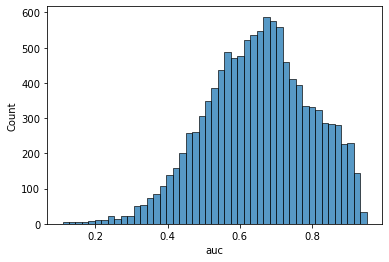

In [68]:
sns.histplot(auc_values_1['auc'])

In [79]:
import numpy as np
auc_values_1 = auc_values_1[auc_values_1['auc'] > np.percentile(auc_values_1['auc'], 90)]

In [18]:
auc_values_1

gene_id_jac_sim chrom_jac_sim gene_id_exp_file chrom_exp_file       auc
4         FBgn0031602         chr2L      FBgn0031602          chr2L  0.898389
11        FBgn0039633         chr3R      FBgn0039633          chr3R  0.877548
15        FBgn0000464         chr2L      FBgn0000464          chr2L  0.877113
21        FBgn0000228         chr2L      FBgn0000228          chr2L  0.861858
32        FBgn0261553         chr3L      FBgn0261553          chr3L  0.850491
...               ...           ...              ...            ...       ...
11468     FBgn0004880         chr3L      FBgn0004880          chr3L  0.919519
11478     FBgn0260486         chr2L      FBgn0260486          chr2L  0.861301
11481     FBgn0259222         chr3R      FBgn0259222          chr3R  0.896047
11490     FBgn0038087         chr3R      FBgn0038087          chr3R  0.900128
11492     FBgn0011582         chr3R      FBgn0011582          chr3R  0.937700

[1151 rows x 5 columns]

In [86]:
df1 = df_exp_rank.merge(auc_values_1, left_on='fruitfly', right_on='gene_id_exp_file')

In [88]:
auc_values_1 = auc_values_1[auc_values_1['auc'] < np.percentile(auc_values_1['auc'], 90)]

<AxesSubplot:xlabel='auc', ylabel='Count'>

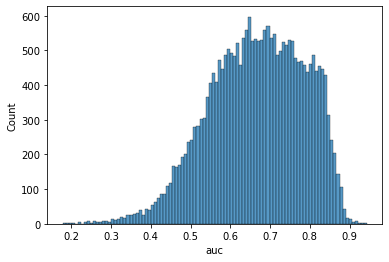

In [49]:
sns.histplot(auc_values_1['auc'], bins=100)

In [89]:
df2 = df1.merge(auc_values_1, left_on='human', right_on='gene_id_exp_file')

In [30]:
df2

Unnamed: 0            human               mouse human_OrthoID_x  \
0             10  ENSG00000117222  ENSMUSG00000026439   9606_0:00004c   
1             12  ENSG00000135972  ENSMUSG00000060679   9606_0:000ad4   
2             13  ENSG00000203667  ENSMUSG00000026500   9606_0:000215   
3             14  ENSG00000119537  ENSMUSG00000009905   9606_0:004411   
4             16  ENSG00000247626  ENSMUSG00000046994   9606_0:000d41   
...          ...              ...                 ...             ...   
1741        2224  ENSG00000168883  ENSMUSG00000056305   9606_0:000a97   
1742        2226  ENSG00000149089  ENSMUSG00000010911   9606_0:002f69   
1743        2229  ENSG00000159267  ENSMUSG00000040820   9606_0:004d7a   
1744        2230  ENSG00000082515  ENSMUSG00000020514   9606_0:00189f   
1745        2231  ENSG00000142731  ENSMUSG00000025758   9606_0:0012eb   

       mouse_OrthoID     fruitfly fruitfly_OrthoID human_OrthoID_y  \
0     10090_0:000015  FBgn0036973    7227_0:001de4   9606_0:00004c   
1     10090_0:000035  FBgn0037529    7227_0:0020e2   9606_0:000ad4   
2     10090_0:00003d  FBgn0002354    7227_0:002384   9606_0:000215   
3     10090_0:00003f  FBgn0039304    7227_0:002943   9606_0:004411   
4     10090_0:000046  FBgn0027083    7227_0:002415   9606_0:000d41   
...              ...          ...              ...             ...   
1741  10090_0:005820  FBgn0030969    7227_0:0033b0   9606_0:000a97   
1742  10090_0:005834  FBgn0030518    7227_0:003199   9606_0:002f69   
1743  10090_0:00586d  FBgn0037332    7227_0:001fcf   9606_0:004d7a   
1744  10090_0:0058ac  FBgn0030786    7227_0:0032e4   9606_0:00189f   
1745  10090_0:005975  FBgn0026371    7227_0:001e82   9606_0:0012eb   

     gene_id_jac_sim_x chrom_jac_sim_x gene_id_exp_file_x chrom_exp_file_x  \
0          FBgn0036973           chr3L        FBgn0036973            chr3L   
1          FBgn0037529           chr3R        FBgn0037529            chr3R   
2          FBgn0002354           chr3R        FBgn0002354            chr3R   
3          FBgn0039304           chr3R        FBgn0039304            chr3R   
4          FBgn0027083           chr3R        FBgn0027083            chr3R   
...                ...             ...                ...              ...   
1741       FBgn0030969            chrX        FBgn0030969             chrX   
1742       FBgn0030518            chrX        FBgn0030518             chrX   
1743       FBgn0037332           chr3R        FBgn0037332            chr3R   
1744       FBgn0030786            chrX        FBgn0030786             chrX   
1745       FBgn0026371           chr3L        FBgn0026371            chr3L   

         auc_x gene_id_jac_sim_y chrom_jac_sim_y gene_id_exp_file_y  \
0     0.632205   ENSG00000117222            chr1    ENSG00000117222   
1     0.405795   ENSG00000135972            chr2    ENSG00000135972   
2     0.631748   ENSG00000203667            chr1    ENSG00000203667   
3     0.558952   ENSG00000119537           chr18    ENSG00000119537   
4     0.456579   ENSG00000247626            chr2    ENSG00000247626   
...        ...               ...             ...                ...   
1741  0.682193   ENSG00000168883            chr2    ENSG00000168883   
1742  0.481030   ENSG00000149089           chr11    ENSG00000149089   
1743  0.762256   ENSG00000159267           chr21    ENSG00000159267   
1744  0.446570   ENSG00000082515            chr5    ENSG00000082515   
1745  0.606532   ENSG00000142731            chr4    ENSG00000142731   

     chrom_exp_file_y     auc_y  
0                chr1  0.535176  
1                chr2  0.596070  
2                chr1  0.614902  
3               chr18  0.741721  
4                chr2  0.576413  
...               ...       ...  
1741             chr2  0.736282  
1742            chr11  0.640732  
1743            chr21  0.591063  
1744             chr5  0.581719  
1745             chr4  0.714931  

[1746 rows x 18 columns]

In [316]:
file_path_1 = "/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_mouse/all_proj_agg/10kbp_raw_genome_wide_KR_per_chr_ranked_90_gene_by_all_bins_tss_jac_sim_auc.txt"
auc_values_1 = pd.read_csv(file_path_1, sep='\t', names=['resol', 'chrom_m', 'auc_m', 'gene_m'])


In [326]:
auc_values_1['ortho'] = ['t' if x in df3['gene_m'].tolist() else 'f' for x in auc_values_1['gene_m']]

In [317]:
df3 = df2.merge(auc_values_1, left_on='mouse', right_on='gene_m')

In [318]:
df3

Unnamed: 0            human               mouse human_OrthoID_x  \
0             10  ENSG00000117222  ENSMUSG00000026439   9606_0:00004c   
1             11  ENSG00000187957  ENSMUSG00000036766   9606_0:000938   
2             12  ENSG00000135972  ENSMUSG00000060679   9606_0:000ad4   
3             13  ENSG00000203667  ENSMUSG00000026500   9606_0:000215   
4             14  ENSG00000119537  ENSMUSG00000009905   9606_0:004411   
...          ...              ...                 ...             ...   
2071        2226  ENSG00000149089  ENSMUSG00000010911   9606_0:002f69   
2072        2227  ENSG00000138688  ENSMUSG00000037270   9606_0:00135e   
2073        2229  ENSG00000159267  ENSMUSG00000040820   9606_0:004d7a   
2074        2230  ENSG00000082515  ENSMUSG00000020514   9606_0:00189f   
2075        2231  ENSG00000142731  ENSMUSG00000025758   9606_0:0012eb   

       mouse_OrthoID     fruitfly fruitfly_OrthoID human_OrthoID_y    resol_x  \
0     10090_0:000015  FBgn0036973    7227_0:001de4   9606_0:00004c  10kbp_raw   
1     10090_0:00001f  FBgn0051665    7227_0:0000d8   9606_0:000938  10kbp_raw   
2     10090_0:000035  FBgn0037529    7227_0:0020e2   9606_0:000ad4  10kbp_raw   
3     10090_0:00003d  FBgn0002354    7227_0:002384   9606_0:000215  10kbp_raw   
4     10090_0:00003f  FBgn0039304    7227_0:002943   9606_0:004411  10kbp_raw   
...              ...          ...              ...             ...        ...   
2071  10090_0:005834  FBgn0030518    7227_0:003199   9606_0:002f69  10kbp_raw   
2072  10090_0:005836  FBgn0261671    7227_0:0007ca   9606_0:00135e  10kbp_raw   
2073  10090_0:00586d  FBgn0037332    7227_0:001fcf   9606_0:004d7a  10kbp_raw   
2074  10090_0:0058ac  FBgn0030786    7227_0:0032e4   9606_0:00189f  10kbp_raw   
2075  10090_0:005975  FBgn0026371    7227_0:001e82   9606_0:0012eb  10kbp_raw   

     chrom_d     auc_d       gene_d    resol_y chrom_h     auc_h  \
0      chr3L  0.639649  FBgn0036973  10kbp_raw    chr1  0.549784   
1      chr2L  0.857586  FBgn0051665  10kbp_raw    chr2  0.563615   
2      chr3R  0.705843  FBgn0037529  10kbp_raw    chr2  0.690809   
3      chr3R  0.662757  FBgn0002354  10kbp_raw    chr1  0.555746   
4      chr3R  0.658700  FBgn0039304  10kbp_raw   chr18  0.865163   
...      ...       ...          ...        ...     ...       ...   
2071    chrX  0.688345  FBgn0030518  10kbp_raw   chr11  0.764208   
2072   chr2L  0.662308  FBgn0261671  10kbp_raw    chr4  0.753633   
2073   chr3R  0.650981  FBgn0037332  10kbp_raw   chr21  0.759124   
2074    chrX  0.693702  FBgn0030786  10kbp_raw    chr5  0.655260   
2075   chr3L  0.647954  FBgn0026371  10kbp_raw    chr4  0.704610   

               gene_h      resol chrom_m     auc_m              gene_m  
0     ENSG00000117222  10kbp_raw    chr1  0.706809  ENSMUSG00000026439  
1     ENSG00000187957  10kbp_raw    chr1  0.417778  ENSMUSG00000036766  
2     ENSG00000135972  10kbp_raw    chr1  0.759125  ENSMUSG00000060679  
3     ENSG00000203667  10kbp_raw    chr1  0.806478  ENSMUSG00000026500  
4     ENSG00000119537  10kbp_raw    chr1  0.884728  ENSMUSG00000009905  
...               ...        ...     ...       ...                 ...  
2071  ENSG00000149089  10kbp_raw    chr2  0.697507  ENSMUSG00000010911  
2072  ENSG00000138688  10kbp_raw    chr3  0.679755  ENSMUSG00000037270  
2073  ENSG00000159267  10kbp_raw   chr16  0.574391  ENSMUSG00000040820  
2074  ENSG00000082515  10kbp_raw   chr11  0.659312  ENSMUSG00000020514  
2075  ENSG00000142731  10kbp_raw    chr3  0.722198  ENSMUSG00000025758  

[2076 rows x 20 columns]

<AxesSubplot:xlabel='auc_x', ylabel='auc_y'>

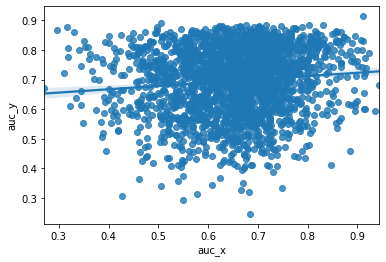

In [56]:
import seaborn as sns
sns.regplot(data=df2, x='auc_x', y='auc_y')

<AxesSubplot:xlabel='auc_x', ylabel='auc_y'>

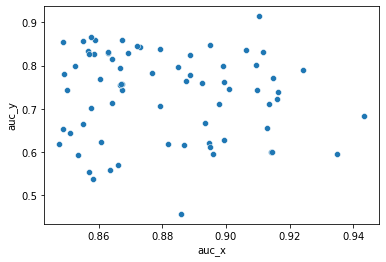

In [83]:
import seaborn as sns
sns.scatterplot(data=df2, x='auc_x', y='auc_y')

<AxesSubplot:xlabel='auc_x', ylabel='auc_y'>

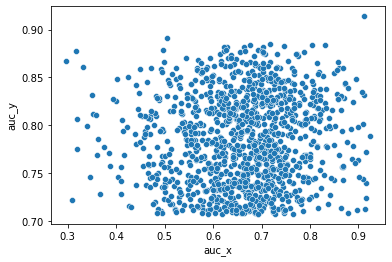

In [90]:
import seaborn as sns
sns.scatterplot(data=df2, x='auc_x', y='auc_y')

<AxesSubplot:xlabel='auc_x', ylabel='auc_y'>

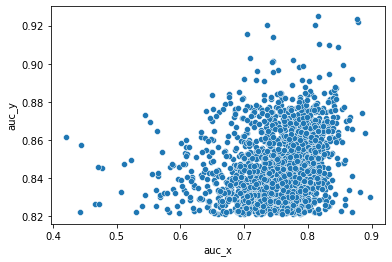

In [104]:
import seaborn as sns
sns.scatterplot(data=df2, x='auc_x', y='auc_y')

<AxesSubplot:xlabel='auc_x', ylabel='auc_y'>

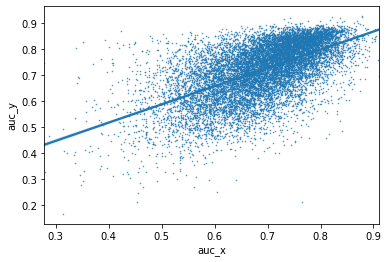

In [119]:
import seaborn as sns
sns.regplot(data=df2, x='auc_x', y='auc_y', scatter_kws={"s": 0.3})

<AxesSubplot:xlabel='auc_x', ylabel='auc_y'>

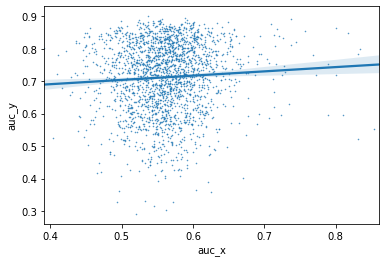

In [129]:
import seaborn as sns
sns.regplot(data=df2, x='auc_x', y='auc_y', scatter_kws={"s": 0.3})

<AxesSubplot:xlabel='auc_x', ylabel='auc_y'>

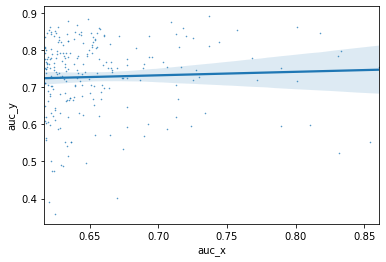

In [134]:
import seaborn as sns
sns.regplot(data=df2, x='auc_x', y='auc_y', scatter_kws={"s": 0.3})

In [130]:
df2

drosophila            human fruitfly_OrthoID  human_OrthoID  \
0     FBgn0037894  ENSG00000198700    7227_0:00229f  9606_0:00000d   
1     FBgn0032321  ENSG00000163159    7227_0:000584  9606_0:00001d   
2     FBgn0038877  ENSG00000203705    7227_0:00272d  9606_0:000026   
3     FBgn0035484  ENSG00000172456    7227_0:001691  9606_0:000049   
4     FBgn0036973  ENSG00000117222    7227_0:001de4  9606_0:00004c   
...           ...              ...              ...            ...   
2198  FBgn0037081  ENSG00000102241    7227_0:001e74  9606_0:005358   
2199  FBgn0030521  ENSG00000164733    7227_0:0031a0  9606_0:0053f0   
2200  FBgn0260959  ENSG00000147316    7227_0:000d6b  9606_0:0053f6   
2201  FBgn0010438  ENSG00000106028    7227_0:0024ff  9606_0:0054bb   
2202  FBgn0033029  ENSG00000088038    7227_0:000a4b  9606_0:005543   

     gene_id_jac_sim_x chrom_jac_sim_x gene_id_exp_file_x chrom_exp_file_x  \
0          FBgn0037894           chr3R        FBgn0037894            chr3R   
1          FBgn0032321           chr2L        FBgn0032321            chr2L   
2          FBgn0038877           chr3R        FBgn0038877            chr3R   
3          FBgn0035484           chr3L        FBgn0035484            chr3L   
4          FBgn0036973           chr3L        FBgn0036973            chr3L   
...                ...             ...                ...              ...   
2198       FBgn0037081           chr3L        FBgn0037081            chr3L   
2199       FBgn0030521            chrX        FBgn0030521             chrX   
2200       FBgn0260959           chr2R        FBgn0260959            chr2R   
2201       FBgn0010438           chr3R        FBgn0010438            chr3R   
2202       FBgn0033029           chr2R        FBgn0033029            chr2R   

         auc_x gene_id_jac_sim_y chrom_jac_sim_y gene_id_exp_file_y  \
0     0.569542   ENSG00000198700            chr1    ENSG00000198700   
1     0.513609   ENSG00000163159            chr1    ENSG00000163159   
2     0.522687   ENSG00000203705            chr1    ENSG00000203705   
3     0.463799   ENSG00000172456            chr1    ENSG00000172456   
4     0.533922   ENSG00000117222            chr1    ENSG00000117222   
...        ...               ...             ...                ...   
2198  0.562132   ENSG00000102241            chrX    ENSG00000102241   
2199  0.608589   ENSG00000164733            chr8    ENSG00000164733   
2200  0.563237   ENSG00000147316            chr8    ENSG00000147316   
2201  0.498756   ENSG00000106028            chr7    ENSG00000106028   
2202  0.639343   ENSG00000088038           chr19    ENSG00000088038   

     chrom_exp_file_y     auc_y  
0                chr1  0.675129  
1                chr1  0.781228  
2                chr1  0.685736  
3                chr1  0.783042  
4                chr1  0.551195  
...               ...       ...  
2198             chrX  0.596996  
2199             chr8  0.671013  
2200             chr8  0.754135  
2201             chr7  0.521994  
2202            chr19  0.849239  

[2203 rows x 14 columns]

<AxesSubplot:xlabel='auc_x', ylabel='auc_y'>

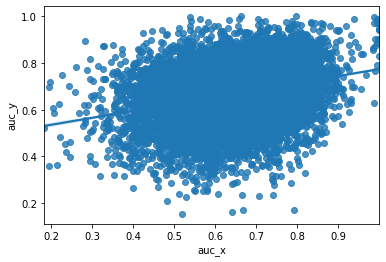

In [106]:
import seaborn as sns
sns.regplot(data=df2, x='auc_x', y='auc_y')

<AxesSubplot:xlabel='auc_h', ylabel='auc_d'>

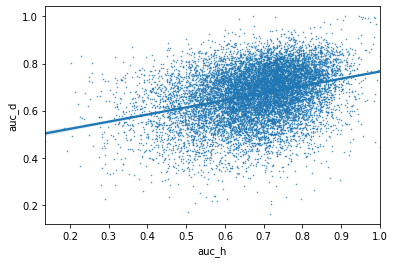

In [300]:
import seaborn as sns
sns.regplot(data=df2, x='auc_h', y='auc_d', scatter_kws={"s": 0.3})

<AxesSubplot:xlabel='auc_h', ylabel='auc_d'>

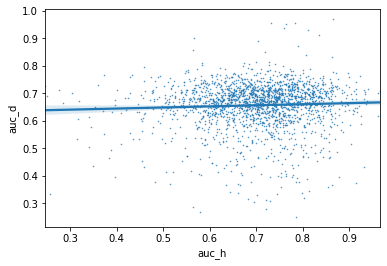

In [321]:
import seaborn as sns
sns.regplot(data=df3, x='auc_h', y='auc_d', scatter_kws={"s": 0.3})

<AxesSubplot:xlabel='auc_h', ylabel='auc_m'>

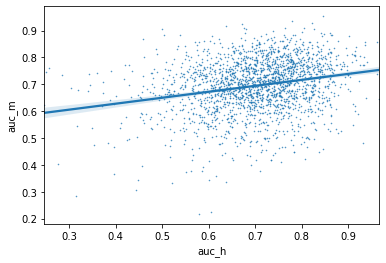

In [330]:
import seaborn as sns
sns.regplot(data=df3, x='auc_h', y='auc_m', scatter_kws={"s": 0.3})

<AxesSubplot:xlabel='auc_m', ylabel='Count'>

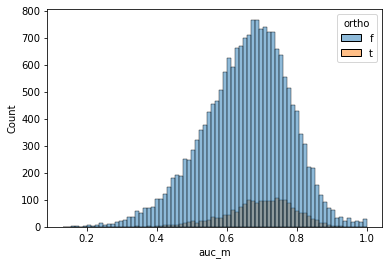

In [329]:
sns.histplot(data=auc_values_1, x='auc_m', hue='ortho')

In [328]:
auc_values_1

resol chrom_m     auc_m              gene_m ortho
0      10kbp_raw    chr1  0.651395  ENSMUSG00000103984     f
1      10kbp_raw    chr1  0.774941  ENSMUSG00000018196     f
2      10kbp_raw    chr1  0.491135  ENSMUSG00000037035     f
3      10kbp_raw    chr1  0.800591  ENSMUSG00000036815     f
4      10kbp_raw    chr1  0.856690  ENSMUSG00000048495     f
...          ...     ...       ...                 ...   ...
21344  10kbp_raw    chrX  0.777600  ENSMUSG00000071723     f
21345  10kbp_raw    chrX  0.659940  ENSMUSG00000041245     f
21346  10kbp_raw    chrX  0.844544  ENSMUSG00000079487     f
21347  10kbp_raw    chrX  0.525411  ENSMUSG00000054850     f
21348  10kbp_raw    chrX  0.395046  ENSMUSG00000081049     f

[21349 rows x 5 columns]

In [325]:
auc_values_1['auc_m'].median()

0.6701656669522994

<AxesSubplot:xlabel='auc_d', ylabel='auc_h'>

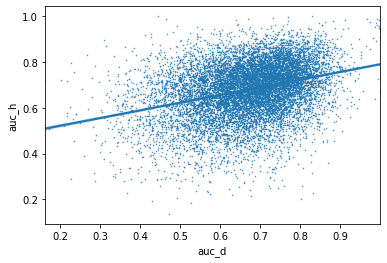

In [299]:
import seaborn as sns
sns.regplot(data=df2, x='auc_d', y='auc_h', scatter_kws={"s": 0.3})

<AxesSubplot:xlabel='auc_d', ylabel='auc_h'>

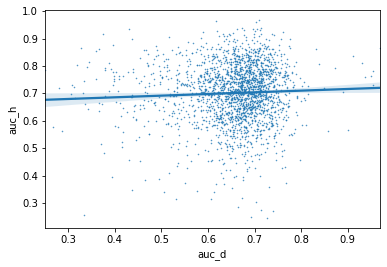

In [310]:
import seaborn as sns
sns.regplot(data=df2, x='auc_d', y='auc_h', scatter_kws={"s": 0.3})

In [201]:
z = df_exp_rank.merge(df_gene, left_on='fruitfly', right_on='gene_id')

In [203]:
z.columns

Index(['fruitfly', 'human', 'fruitfly_OrthoID', 'human_OrthoID', 'Chromosome',
       'Source', 'Feature', 'Start', 'End', 'Score', 'Strand', 'Frame',
       'gene_id', 'gene_name', 'gene_source', 'gene_biotype', 'transcript_id',
       'transcript_name', 'transcript_source', 'transcript_biotype',
       'exon_number', 'exon_id', 'protein_id', 'protein_version', 'tag'],
      dtype='object')

In [190]:
df_gene[df_gene['Chromosome'] == 'Y']

Chromosome   Source Feature    Start      End Score Strand Frame  \
510585          Y  FlyBase    gene     9832    10786     .      +     .   
510591          Y  FlyBase    gene   336380   563165     .      +     .   
510628          Y  FlyBase    gene   573087   664173     .      +     .   
510656          Y  FlyBase    gene   702429   704048     .      +     .   
510685          Y  FlyBase    gene   939935   940435     .      +     .   
...           ...      ...     ...      ...      ...   ...    ...   ...   
511188          Y  FlyBase    gene  3242064  3242646     .      -     .   
511191          Y  FlyBase    gene  3250354  3251252     .      -     .   
511194          Y  FlyBase    gene  3252955  3253357     .      -     .   
511200          Y  FlyBase    gene  3267087  3268196     .      -     .   
511205          Y  FlyBase    gene  3539436  3540722     .      -     .   

            gene_id        gene_name  ...    gene_biotype transcript_id  \
510585  FBgn0261399           Pp1-Y1  ...  protein_coding           NaN   
510591  FBgn0267432             kl-3  ...  protein_coding           NaN   
510628  FBgn0001313             kl-2  ...  protein_coding           NaN   
510656  FBgn0058064              ARY  ...  protein_coding           NaN   
510685  FBgn0259858  Su(Ste):CR42427  ...           ncRNA           NaN   
...             ...              ...  ...             ...           ...   
511188  FBgn0267902          CR46190  ...      pseudogene           NaN   
511191  FBgn0283435          CR46279  ...      pseudogene           NaN   
511194  FBgn0267904          CG46192  ...  protein_coding           NaN   
511200  FBgn0085520          CR40801  ...      pseudogene           NaN   
511205  FBgn0046698           Pp1-Y2  ...  protein_coding           NaN   

       transcript_name transcript_source transcript_biotype exon_number  \
510585             NaN               NaN                NaN         NaN   
510591             NaN               NaN                NaN         NaN   
510628             NaN               NaN                NaN         NaN   
510656             NaN               NaN                NaN         NaN   
510685             NaN               NaN                NaN         NaN   
...                ...               ...                ...         ...   
511188             NaN               NaN                NaN         NaN   
511191             NaN               NaN                NaN         NaN   
511194             NaN               NaN                NaN         NaN   
511200             NaN               NaN                NaN         NaN   
511205             NaN               NaN                NaN         NaN   

       exon_id protein_id protein_version  tag  
510585     NaN        NaN             NaN  NaN  
510591     NaN        NaN             NaN  NaN  
510628     NaN        NaN             NaN  NaN  
510656     NaN        NaN             NaN  NaN  
510685     NaN        NaN             NaN  NaN  
...        ...        ...             ...  ...  
511188     NaN        NaN             NaN  NaN  
511191     NaN        NaN             NaN  NaN  
511194     NaN        NaN             NaN  NaN  
511200     NaN        NaN             NaN  NaN  
511205     NaN        NaN             NaN  NaN  

[113 rows x 21 columns]

In [192]:
df_gene[df_gene['Chromosome'] == 'X']

Chromosome   Source Feature     Start       End Score Strand Frame  \
418475          X  FlyBase    gene    122492    122706     .      +     .   
418478          X  FlyBase    gene    127448    140340     .      +     .   
418653          X  FlyBase    gene    133384    133502     .      +     .   
418656          X  FlyBase    gene    142207    200663     .      +     .   
418773          X  FlyBase    gene    245977    254650     .      +     .   
...           ...      ...     ...       ...       ...   ...    ...   ...   
510570          X  FlyBase    gene  23270801  23271158     .      -     .   
510573          X  FlyBase    gene  23278006  23283731     .      -     .   
510576          X  FlyBase    gene  23278006  23280010     .      -     .   
510579          X  FlyBase    gene  23280154  23280277     .      -     .   
510582          X  FlyBase    gene  23280997  23282931     .      -     .   

            gene_id            gene_name  ...    gene_biotype transcript_id  \
418475  FBgn0058469              CR40469  ...           ncRNA           NaN   
418478  FBgn0025836             RhoGAP1A  ...  protein_coding           NaN   
418653  FBgn0263567             mir-4915  ...       pre_miRNA           NaN   
418656  FBgn0284435                  tyn  ...  protein_coding           NaN   
418773  FBgn0040372                  G9a  ...  protein_coding           NaN   
...             ...                  ...  ...             ...           ...   
510570  FBgn0267520  28SrRNA-Psi:CR45860  ...      pseudogene           NaN   
510573  FBgn0267516     pre-rRNA:CR45856  ...            rRNA           NaN   
510576  FBgn0267522  28SrRNA-Psi:CR45862  ...      pseudogene           NaN   
510579  FBgn0250731     5.8SrRNA:CR40454  ...            rRNA           NaN   
510582  FBgn0267521  18SrRNA-Psi:CR45861  ...      pseudogene           NaN   

       transcript_name transcript_source transcript_biotype exon_number  \
418475             NaN               NaN                NaN         NaN   
418478             NaN               NaN                NaN         NaN   
418653             NaN               NaN                NaN         NaN   
418656             NaN               NaN                NaN         NaN   
418773             NaN               NaN                NaN         NaN   
...                ...               ...                ...         ...   
510570             NaN               NaN                NaN         NaN   
510573             NaN               NaN                NaN         NaN   
510576             NaN               NaN                NaN         NaN   
510579             NaN               NaN                NaN         NaN   
510582             NaN               NaN                NaN         NaN   

       exon_id protein_id protein_version  tag  
418475     NaN        NaN             NaN  NaN  
418478     NaN        NaN             NaN  NaN  
418653     NaN        NaN             NaN  NaN  
418656     NaN        NaN             NaN  NaN  
418773     NaN        NaN             NaN  NaN  
...        ...        ...             ...  ...  
510570     NaN        NaN             NaN  NaN  
510573     NaN        NaN             NaN  NaN  
510576     NaN        NaN             NaN  NaN  
510579     NaN        NaN             NaN  NaN  
510582     NaN        NaN             NaN  NaN  

[2671 rows x 21 columns]

In [191]:
df_gene[df_gene['gene_id'] == 'FBgn0261399']

Chromosome   Source Feature  Start    End Score Strand Frame  \
510585          Y  FlyBase    gene   9832  10786     .      +     .   

            gene_id gene_name  ...    gene_biotype transcript_id  \
510585  FBgn0261399    Pp1-Y1  ...  protein_coding           NaN   

       transcript_name transcript_source transcript_biotype exon_number  \
510585             NaN               NaN                NaN         NaN   

       exon_id protein_id protein_version  tag  
510585     NaN        NaN             NaN  NaN  

[1 rows x 21 columns]

In [160]:
df_transcript = df[df['Feature'] == 'transcript']

In [178]:
df_gene = df[df['Feature'] == 'gene']

In [179]:
df_gene['gene_id'].drop_duplicates(inplace=True)

<ipython-input-179-ae26c0c0fad6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gene['gene_id'].drop_duplicates(inplace=True)


In [180]:
df_gene

Chromosome   Source Feature     Start       End Score Strand Frame  \
0                1   havana    gene   3073252   3074322     .      +     .   
3                1  ensembl    gene   3102015   3102125     .      +     .   
6                1   havana    gene   3252756   3253236     .      +     .   
9                1   havana    gene   3466586   3513553     .      +     .   
13               1   havana    gene   3531794   3532720     .      +     .   
...            ...      ...     ...       ...       ...   ...    ...   ...   
1807427          Y   havana    gene  90499046  90531645     .      -     .   
1807439          Y   havana    gene  90603500  90605864     .      -     .   
1807449          Y   havana    gene  90665345  90667625     .      -     .   
1807459          Y  ensembl    gene  90754512  90754821     .      -     .   
1807465          Y  ensembl    gene  90838868  90839177     .      -     .   

                    gene_id gene_version  ... transcript_source  \
0        ENSMUSG00000102693            1  ...               NaN   
3        ENSMUSG00000064842            1  ...               NaN   
6        ENSMUSG00000102851            1  ...               NaN   
9        ENSMUSG00000089699            1  ...               NaN   
13       ENSMUSG00000103147            1  ...               NaN   
...                     ...          ...  ...               ...   
1807427  ENSMUSG00000100964            1  ...               NaN   
1807439  ENSMUSG00000099619            6  ...               NaN   
1807449  ENSMUSG00000099399            6  ...               NaN   
1807459  ENSMUSG00000095366            1  ...               NaN   
1807465  ENSMUSG00000096850            1  ...               NaN   

        transcript_biotype  tag transcript_support_level exon_number exon_id  \
0                      NaN  NaN                      NaN         NaN     NaN   
3                      NaN  NaN                      NaN         NaN     NaN   
6                      NaN  NaN                      NaN         NaN     NaN   
9                      NaN  NaN                      NaN         NaN     NaN   
13                     NaN  NaN                      NaN         NaN     NaN   
...                    ...  ...                      ...         ...     ...   
1807427                NaN  NaN                      NaN         NaN     NaN   
1807439                NaN  NaN                      NaN         NaN     NaN   
1807449                NaN  NaN                      NaN         NaN     NaN   
1807459                NaN  NaN                      NaN         NaN     NaN   
1807465                NaN  NaN                      NaN         NaN     NaN   

        exon_version ccds_id protein_id protein_version  
0                NaN     NaN        NaN             NaN  
3                NaN     NaN        NaN             NaN  
6                NaN     NaN        NaN             NaN  
9                NaN     NaN        NaN             NaN  
13               NaN     NaN        NaN             NaN  
...              ...     ...        ...             ...  
1807427          NaN     NaN        NaN             NaN  
1807439          NaN     NaN        NaN             NaN  
1807449          NaN     NaN        NaN             NaN  
1807459          NaN     NaN        NaN             NaN  
1807465          NaN     NaN        NaN             NaN  

[54532 rows x 26 columns]

In [157]:
df_transcript = df_transcript[df_transcript['Source']=='ENSEMBL']

In [162]:
df_transcript.head(20)

Chromosome   Source     Feature   Start     End Score Strand Frame  \
1    GL000009.2  ENSEMBL  transcript   56139   58376     .      -     .   
9    GL000194.1  ENSEMBL  transcript   53589  115018     .      -     .   
21   GL000194.1  ENSEMBL  transcript   53593  115055     .      -     .   
35   GL000195.1  ENSEMBL  transcript  173871  179372     .      +     .   
49   GL000195.1  ENSEMBL  transcript   37433   37534     .      -     .   
52   GL000195.1  ENSEMBL  transcript   42938   49164     .      -     .   
62   GL000205.2  ENSEMBL  transcript   93049   93150     .      -     .   
65   GL000205.2  ENSEMBL  transcript   99350  104855     .      -     .   
79   GL000209.2   HAVANA  transcript    2843   11554     .      -     .   
94   GL000209.2  ENSEMBL  transcript    6056   11521     .      -     .   
105  GL000209.2   HAVANA  transcript   13876   27891     .      -     .   
127  GL000209.2   HAVANA  transcript   29980   44855     .      -     .   
149  GL000209.2   HAVANA  transcript   46834   56299     .      -     .   
171  GL000209.2   HAVANA  transcript   58557   72919     .      -     .   
195  GL000209.2  ENSEMBL  transcript   74866   85943     .      -     .   
214  GL000209.2   HAVANA  transcript   75261   85741     .      -     .   
235  GL000209.2   HAVANA  transcript   91107  104511     .      -     .   
253  GL000209.2  ENSEMBL  transcript  106542  137267     .      -     .   
273  GL000209.2   HAVANA  transcript  123237  137319     .      -     .   
295  GL000209.2   HAVANA  transcript  106756  121079     .      -     .   

               gene_id       gene_type  ... transcript_type  \
1    ENSG00000278704.1  protein_coding  ...  protein_coding   
9    ENSG00000277400.1  protein_coding  ...  protein_coding   
21   ENSG00000274847.1  protein_coding  ...  protein_coding   
35   ENSG00000278198.1  protein_coding  ...  protein_coding   
49   ENSG00000277428.1        misc_RNA  ...        misc_RNA   
52   ENSG00000276256.1  protein_coding  ...  protein_coding   
62   ENSG00000276932.1        misc_RNA  ...        misc_RNA   
65   ENSG00000273496.1  protein_coding  ...  protein_coding   
79   ENSG00000273735.4  protein_coding  ...  protein_coding   
94   ENSG00000273735.4  protein_coding  ...  protein_coding   
105  ENSG00000273517.1  protein_coding  ...  protein_coding   
127  ENSG00000277650.1  protein_coding  ...  protein_coding   
149  ENSG00000274676.1  protein_coding  ...  protein_coding   
171  ENSG00000276534.5  protein_coding  ...  protein_coding   
195  ENSG00000274193.4  protein_coding  ...  protein_coding   
214  ENSG00000274193.4  protein_coding  ...  protein_coding   
235  ENSG00000276518.1  protein_coding  ...  protein_coding   
253  ENSG00000278152.2  protein_coding  ...  protein_coding   
273  ENSG00000278152.2  protein_coding  ...  protein_coding   
295  ENSG00000273661.5  protein_coding  ...  protein_coding   

        transcript_name transcript_support_level         tag  \
1        BX004987.1-201                       NA       basic   
9        AC145212.1-201                        1       basic   
21            MAFIP-201                        1       basic   
35       AC011043.2-201                        5       basic   
49      RF00019.808-201                       NA       basic   
52       AC011043.1-201                        2       basic   
62      RF00019.805-201                       NA       basic   
65       AC011841.1-201                        5       basic   
79   RP5-1060P11.10-001                        1  cds_end_NF   
94          KIR3DL2-203                        5       basic   
105   RP5-1060P11.9-001                        1       basic   
127   RP5-1060P11.8-001                        1       basic   
149   RP5-1060P11.7-001                        1       basic   
171   RP5-1060P11.6-001                        1       basic   
195         KIR2DL4-220                        1       basic   
214   RP5-1060P11.5-001                        1       basic   
235   RP5-1060P11

In [155]:
df_transcript['gene_id'].drop_duplicates()

1                 ENSG00000278704.1
9                 ENSG00000277400.1
21                ENSG00000274847.1
35                ENSG00000278198.1
49                ENSG00000277428.1
                     ...           
2939636     ENSG00000237801.6_PAR_Y
2939639     ENSG00000228410.6_PAR_Y
2939642     ENSG00000223484.7_PAR_Y
2939645    ENSG00000185203.12_PAR_Y
2939649     ENSG00000227159.8_PAR_Y
Name: gene_id, Length: 64485, dtype: object

In [168]:
df_gene

Chromosome   Source Feature     Start       End Score Strand Frame  \
0        GL000009.2  ENSEMBL    gene     56139     58376     .      -     .   
8        GL000194.1  ENSEMBL    gene     53589    115018     .      -     .   
20       GL000194.1  ENSEMBL    gene     53593    115055     .      -     .   
34       GL000195.1  ENSEMBL    gene    173871    179372     .      +     .   
48       GL000195.1  ENSEMBL    gene     37433     37534     .      -     .   
...             ...      ...     ...       ...       ...   ...    ...   ...   
2939635        chrY   HAVANA    gene  57015104  57016096     .      -     .   
2939638        chrY   HAVANA    gene  57165511  57165845     .      -     .   
2939641        chrY   HAVANA    gene  57171889  57172769     .      -     .   
2939644        chrY   HAVANA    gene  57201142  57203357     .      -     .   
2939648        chrY   HAVANA    gene  57212183  57214397     .      -     .   

                          gene_id               gene_type  ...  \
0               ENSG00000278704.1          protein_coding  ...   
8               ENSG00000277400.1          protein_coding  ...   
20              ENSG00000274847.1          protein_coding  ...   
34              ENSG00000278198.1          protein_coding  ...   
48              ENSG00000277428.1                misc_RNA  ...   
...                           ...                     ...  ...   
2939635   ENSG00000237801.6_PAR_Y    processed_pseudogene  ...   
2939638   ENSG00000228410.6_PAR_Y    processed_pseudogene  ...   
2939641   ENSG00000223484.7_PAR_Y    processed_pseudogene  ...   
2939644  ENSG00000185203.12_PAR_Y               antisense  ...   
2939648   ENSG00000227159.8_PAR_Y  unprocessed_pseudogene  ...   

        transcript_type transcript_name transcript_support_level  tag  \
0                   NaN             NaN                      NaN  NaN   
8                   NaN             NaN                      NaN  NaN   
20                  NaN             NaN                      NaN  NaN   
34                  NaN             NaN                      NaN  NaN   
48                  NaN             NaN                      NaN  NaN   
...                 ...             ...                      ...  ...   
2939635             NaN             NaN                      NaN  PAR   
2939638             NaN             NaN                      NaN  PAR   
2939641             NaN             NaN                      NaN  PAR   
2939644             NaN             NaN                      NaN  PAR   
2939648             NaN             NaN                      NaN  PAR   

        havana_transcript exon_number exon_id  ont protein_id ccdsid  
0                     NaN         NaN     NaN  NaN        NaN    NaN  
8                     NaN         NaN     NaN  NaN        NaN    NaN  
20                    NaN         NaN     NaN  NaN        NaN    NaN  
34                    NaN         NaN     NaN  NaN        NaN    NaN  
48                    NaN         NaN     NaN  NaN        NaN    NaN  
...                   ...         ...     ...  ...        ...    ...  
2939635               NaN         NaN     NaN  NaN        NaN    NaN  
2939638               NaN         NaN     NaN  NaN        NaN    NaN  
2939641               NaN         NaN     NaN  NaN        NaN    NaN  
2939644               NaN         NaN     NaN  NaN        NaN    NaN  
2939648               NaN         NaN     NaN  NaN        NaN    NaN  

[64485 rows x 24 columns]

In [150]:
df.head(20)

Chromosome   Source      Feature   Start     End Score Strand Frame  \
0   GL000009.2  ENSEMBL         gene   56139   58376     .      -     .   
1   GL000009.2  ENSEMBL   transcript   56139   58376     .      -     .   
2   GL000009.2  ENSEMBL         exon   56139   58376     .      -     .   
3   GL000009.2  ENSEMBL          CDS   58083   58308     .      -     0   
4   GL000009.2  ENSEMBL  start_codon   58305   58308     .      -     0   
5   GL000009.2  ENSEMBL   stop_codon   58080   58083     .      -     0   
6   GL000009.2  ENSEMBL          UTR   56139   58083     .      -     .   
7   GL000009.2  ENSEMBL          UTR   58308   58376     .      -     .   
8   GL000194.1  ENSEMBL         gene   53589  115018     .      -     .   
9   GL000194.1  ENSEMBL   transcript   53589  115018     .      -     .   
10  GL000194.1  ENSEMBL         exon  114985  115018     .      -     .   
11  GL000194.1  ENSEMBL         exon  112791  112850     .      -     .   
12  GL000194.1  ENSEMBL         exon   53589   55676     .      -     .   
13  GL000194.1  ENSEMBL          CDS   53649   54021     .      -     0   
14  GL000194.1  ENSEMBL  start_codon   54018   54021     .      -     0   
15  GL000194.1  ENSEMBL   stop_codon   53646   53649     .      -     0   
16  GL000194.1  ENSEMBL          UTR  114985  115018     .      -     .   
17  GL000194.1  ENSEMBL          UTR  112791  112850     .      -     .   
18  GL000194.1  ENSEMBL          UTR   53589   53649     .      -     .   
19  GL000194.1  ENSEMBL          UTR   54021   55676     .      -     .   

              gene_id       gene_type  ... transcript_type transcript_name  \
0   ENSG00000278704.1  protein_coding  ...             NaN             NaN   
1   ENSG00000278704.1  protein_coding  ...  protein_coding  BX004987.1-201   
2   ENSG00000278704.1  protein_coding  ...  protein_coding  BX004987.1-201   
3   ENSG00000278704.1  protein_coding  ...  protein_coding  BX004987.1-201   
4   ENSG00000278704.1  protein_coding  ...  protein_coding  BX004987.1-201   
5   ENSG00000278704.1  protein_coding  ...  protein_coding  BX004987.1-201   
6   ENSG00000278704.1  protein_coding  ...  protein_coding  BX004987.1-201   
7   ENSG00000278704.1  protein_coding  ...  protein_coding  BX004987.1-201   
8   ENSG00000277400.1  protein_coding  ...             NaN             NaN   
9   ENSG00000277400.1  protein_coding  ...  protein_coding  AC145212.1-201   
10  ENSG00000277400.1  protein_coding  ...  protein_coding  AC145212.1-201   
11  ENSG00000277400.1  protein_coding  ...  protein_coding  AC145212.1-201   
12  ENSG00000277400.1  protein_coding  ...  protein_coding  AC145212.1-201   
13  ENSG00000277400.1  protein_coding  ...  protein_coding  AC145212.1-201   
14  ENSG00000277400.1  protein_coding  ...  protein_coding  AC145212.1-201   
15  ENSG00000277400.1  protein_coding  ...  protein_coding  AC145212.1-201   
16  ENSG00000277400.1  protein_coding  ...  protein_coding  AC145212.1-201   
17  ENSG00000277400.1  protein_coding  ...  protein_coding  AC145212.1-201   
18  ENSG00000277400.1  protein_coding  ...  protein_coding  AC145212.1-201   
19  ENSG00000277400.1  protein_coding  ...  protein_coding  AC145212.1-201   

   transcript_support_level    tag havana_transcript exon_number  \
0                       NaN    NaN               NaN         NaN   
1                        NA  basic               NaN         NaN   
2                        NA  basic               NaN           1   
3                        NA  basic               NaN           1   
4                        NA  basic               NaN           1   
5                        NA  basic               NaN           1   
6                        NA  basic               NaN           1   
7                        NA  basic               NaN           1   
8                       NaN    NaN               NaN         NaN   
9                         1  basic               NaN         NaN   
10                        1  basic       

In [136]:
df.columns

Index(['Chromosome', 'Source', 'Feature', 'Start', 'End', 'Score', 'Strand',
       'Frame', 'gene_id', 'gene_type', 'gene_name', 'level', 'havana_gene',
       'transcript_id', 'transcript_type', 'transcript_name',
       'transcript_support_level', 'tag', 'havana_transcript', 'exon_number',
       'exon_id', 'ont', 'protein_id', 'ccdsid'],
      dtype='object')

In [164]:
df['Source'].drop_duplicates()

0     ENSEMBL
78     HAVANA
Name: Source, dtype: object

In [ ]:
#Thiss downloads gencodev36 knowngenes
#https://genome.ucsc.edu/cgi-bin/hgTables?hgsid=1133902899_IYtEfxvteU99lmytOCjaacOaQcnL&clade=mammal&org=Human&db=hg38&hgta_group=genes&hgta_track=encodeCcreCombined&hgta_table=0&hgta_regionType=genome&position=chrX%3A15%2C560%2C138-15%2C602%2C945&hgta_outputType=primaryTable&hgta_outFileName=gencodev32knowngene
! wget http://hgdownload.soe.ucsc.edu/gbdb/hg38/gencode/gencodeV36.bb -P /sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/genomes/
    


In [2]:
    from hicmatrix import HiCMatrix as hm
    from hicmatrix.lib import MatrixFileHandler

INFO:numexpr.utils:Note: NumExpr detected 32 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [42]:
input_file='/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_drosophila/all_proj_agg/10kbp_raw_genome_wide_KR_per_chr.h5' 



In [43]:
hic = hm.hiCMatrix(input_file)

In [44]:
hic

In [55]:
chrom='chrM'

In [56]:
hic.matrix.toarray()

array([[2.03864861e-04, 6.72944195e+03, 2.30803262e+02, ...,
        1.16589666e+01, 0.00000000e+00, 0.00000000e+00],
       [6.72944195e+03, 3.69838673e-05, 2.38919201e+02, ...,
        1.48975992e+01, 0.00000000e+00, 0.00000000e+00],
       [2.30803262e+02, 2.38919201e+02, 4.18684929e-06, ...,
        1.00249862e+01, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.16589666e+01, 1.48975992e+01, 1.00249862e+01, ...,
        6.66772593e-05, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 9.99999940e-06, 5.39996068e+06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 5.39996068e+06, 9.99999940e-06]])

In [57]:
raw_matrix_ice_sparse = hic.matrix[hic.getChrBinRange(chrom)[0]:hic.getChrBinRange(chrom)[1], hic.getChrBinRange(chrom)[0]:hic.getChrBinRange(chrom)[1]]

In [104]:
RAWobserved_csr_triu.toarray()

array([[9.99999940e-06, 5.39996068e+06],
       [0.00000000e+00, 9.99999940e-06]])

In [59]:
from scipy import sparse
import numpy as np
import scipy.stats as stats
import pandas as pd

RAWobserved_csr_triu = sparse.triu(raw_matrix_ice_sparse, k=0, format='csr')

In [66]:
def rank_norm(arr, largest_chrom_size):
    s = arr.shape
    if s[0] != s[1]:
        raise ValueError('network must be a square matrix')
    else:
        s = s[0]
    arr = arr.astype('float16')
    arr = sparse.dia_matrix(arr, dtype=np.float16)
    rank_norm_hic = sparse.dia_matrix((s, s), dtype=np.float16)
    L = int(largest_chrom_size)
    for K in list(range(1, s)):
        diagonal_array = sparse.dia_matrix.diagonal(arr, k=K)
        counter = 0
        while diagonal_array.shape[0] < L:
            counter = counter + 1
            print (counter, diagonal_array.shape[0])
            if (K + counter) < s:
                diagonal_array = np.concatenate((diagonal_array, sparse.dia_matrix.diagonal(arr, k=(K+counter))), axis=0)
            else:
                pass 
            print ("end1")
            diagonal_array = np.concatenate((diagonal_array, sparse.dia_matrix.diagonal(arr, k=(K-counter))), axis=0)
            print ("end2")

        rank_abs = lambda x: stats.rankdata(x)
        normalized_diag = np.apply_along_axis(rank_abs, 0, diagonal_array[0:L])
        normalized_diag = normalized_diag.astype('float16')
        sparse.dia_matrix.setdiag(rank_norm_hic, normalized_diag, k=K) 
        
    return sparse.coo_matrix(rank_norm_hic)


In [106]:
def rank_norm(arr):
    s = arr.shape
    if s[0] != s[1]:
        raise ValueError('network must be a square matrix')
    else:
        s = s[0]
    arr = arr.astype('float64')
    arr = sparse.dia_matrix(arr, dtype=np.float64)
    rank_norm_hic = sparse.dia_matrix((s, s), dtype=np.float64)
    for K in list(range(0, s)): 
        diagonal_array = sparse.dia_matrix.diagonal(arr, k=K)
        rank_abs = lambda x: stats.rankdata(x)
        normalized_diag = np.apply_along_axis(rank_abs, 0, diagonal_array)
        normalized_diag = normalized_diag.astype('float64')
        sparse.dia_matrix.setdiag(rank_norm_hic, normalized_diag, k=K) 
    print ()
    return sparse.coo_matrix(rank_norm_hic)

In [84]:
from scipy.sparse import csr_matrix, triu
A = csr_matrix([[1, 2, 0, 0, 3], [4, 5, 0, 6, 7], [0, 0, 8, 9, 0]],
               dtype='int32')

In [88]:
sparse.dia_matrix.diagonal(A, k=11)

array([], dtype=int32)

In [85]:
A =sparse.dia_matrix(A)

In [86]:
 sparse.coo_matrix(A).toarray()

array([[1, 2, 0, 0, 3],
       [4, 5, 0, 6, 7],
       [0, 0, 8, 9, 0]], dtype=int32)

In [65]:
hic.getChrBinRange('chrY')[1]

367

In [107]:
y=rank_norm(RAWobserved_csr_triu)

In [108]:
y

<2x2 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in COOrdinate format>

In [109]:
y.toarray()

array([[1.5, 1. ],
       [0. , 1.5]])